### Step 1: Get data and Cleanup

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks


In [2]:
customers_data = pd.read_csv('customer_churn.csv') 

In [3]:
customers_data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [5]:
#Lets check for invalid input in the Churn column
customers_data['Churn'].unique()

array([1, 0], dtype=int64)

In [6]:
#Lets check for invalid input in the Account manager column
customers_data['Account_Manager'].unique()

array([0, 1], dtype=int64)

In [7]:
#Lets check for duplicated or repeated row 
sum(customers_data.duplicated()) == 0

True

In [8]:
customers_data[customers_data.duplicated(subset='Names',keep=False)]

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
22,Jennifer Wood,35.0,9381.12,1,6.78,11.0,2006-03-27 20:52:42,"1493 Phillips Haven Lake William, FM 00995-2870","Clark, Campbell and Armstrong",1
439,Jennifer Wood,48.0,11585.16,0,4.61,9.0,2012-03-13 03:24:04,Unit 5568 Box 1967 DPO AE 15638,"Gray, Campbell and Chandler",0


There is a repeated name but from the table above, it seems the two names Jennifer Woods is for two different people

In [9]:
customers_data['Churn'].value_counts()

0    750
1    150
Name: Churn, dtype: int64

In [10]:
customers_data['Account_Manager'].value_counts()

0    467
1    433
Name: Account_Manager, dtype: int64

In [11]:
customers_data['Age'].value_counts()

41.0    69
43.0    59
40.0    58
45.0    56
44.0    53
38.0    51
42.0    49
39.0    48
37.0    48
46.0    48
36.0    39
48.0    36
35.0    32
49.0    30
47.0    29
34.0    25
51.0    21
52.0    20
32.0    18
33.0    16
50.0    15
55.0    14
31.0    11
30.0    11
29.0     9
53.0     8
54.0     8
56.0     5
28.0     5
26.0     2
58.0     2
27.0     1
65.0     1
60.0     1
25.0     1
22.0     1
Name: Age, dtype: int64

In [12]:
len(customers_data['Company'].unique())

873

The column, company and is not useful because it does not have unique inputs

In [13]:
#dropping column company
not_required_columns = ["Company"]
customers_data.drop(labels = not_required_columns, axis =1, inplace=True)

In [14]:
#creating new feature, annual_total_purchase
customers_data['annual_total_purchase']=customers_data['Total_Purchase']/customers_data['Years']

The onboard column is better when it is in year 

In [15]:
date=customers_data['Onboard_date'].str.split('-',expand=True)
date=date.rename(columns={0:'year'})
date

,year,1,2
0,2013,08,30 07:00:40
1,2013,08,13 00:38:46
2,2016,06,29 06:20:07
3,2014,04,22 12:43:12
4,2016,01,19 15:31:15
...,...,...,...
895,2007,12,01 13:29:34
896,2008,12,28 15:23:58
897,2014,06,20 05:10:09
898,2012,05,30 00:15:43


In [16]:
customers_data['Onboard_date']=date['year']
customers_data['Onboard_date']=pd.to_datetime(customers_data['Onboard_date'])

customers_data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Churn,annual_total_purchase
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-01-01,"10265 Elizabeth Mission Barkerburgh, AK 89518",1,1532.797784
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-01-01,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",1,1833.264615
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-01-01,"1331 Keith Court Alyssahaven, DE 90114",1,1931.746627
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-01-01,"13120 Daniel Mount Angelabury, WY 30645-4695",1,1193.853949
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-01,"765 Tricia Row Karenshire, MH 71730",1,1653.161871


### Step 2: Explore Data (asking useful questions)

In other as to examine our data and turn it into useful piece of information, the following statistical research questions and methods will be employed.

**Statistical Research Questions**
- 1. Does number of sites affect churn?
- 2. Does account manager affect churn?
- 3. Does age affect churn?
- 4. Does year affect churn?
- 5. Does Total_Purchase affect churn?
- 6. Does Onboard_date affect churn?
- 7. Which features strongly affects churn?
- 8. can we use a new feature, annual total purchase to predict churn?
- 9. Can we predict car churn based on the available features ?


**Does age affect churn?**

In [17]:
def churn_ratio(col):
    # here we calculate the churn ratio for each value in  col
    d = {}
    for val in customers_data[col].unique():
        a = customers_data[customers_data[col] == val]['Churn'].count()
        b = customers_data[customers_data[col]==val]['Churn'].sum()
        d[val] = [a, b, round(b/a*100, 2)]

    p=pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: f'uniq_count_{customers_data[col].name}', 1: 'num_of_Churn',2: 'churn_ratio'}).sort_values(by=['churn_ratio'], ascending=False)
    return p

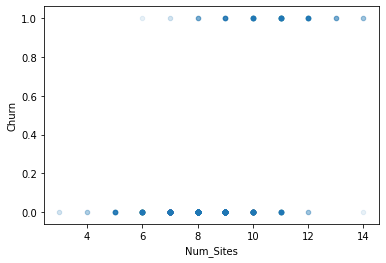

In [18]:
customers_data.plot.scatter(x="Num_Sites", y="Churn", alpha=0.1)
plt.show()

In [19]:
#for people with number of sites less than 8
customers_data[customers_data["Num_Sites"]<8]['Churn'].value_counts()

0    238
1      3
Name: Churn, dtype: int64

In [20]:
#for people with number of sites greater than and less than 12
customers_data[(customers_data["Num_Sites"]>8)&(customers_data["Num_Sites"]<12)]['Churn'].value_counts()

0    301
1     99
Name: Churn, dtype: int64

In [21]:
#for people with number of sites greater than 12
customers_data[customers_data["Num_Sites"]>12]['Churn'].value_counts()

1    13
0     1
Name: Churn, dtype: int64

In [22]:
# here we calculate the churn ratio for each value in Num_Sites
churn_ratio('Num_Sites')

,uniq_count_Num_Sites,num_of_Churn,churn_ratio
13.0,8,8,100.00
12.0,32,27,84.38
14.0,6,5,83.33
11.0,83,46,55.42
10.0,131,34,25.95
9.0,186,19,10.22
8.0,213,8,3.76
6.0,67,1,1.49
7.0,146,2,1.37
5.0,22,0,0.00


**Observations**
- Number of sites affects churn very well. 
- Poeple that visited less websites did not usually churn while those that visited more websites usually churn 
- Only 3 people churn out of 241 people with less than 8 visited sites
- Only 1 person did not churn out 14 people with greater than 12 visited sites
- The more the number of websites visited the more thre tendency of churning

**Does account manager affect churn?**


In [23]:
# here we calculate the churn ratio for each value in Account_Manager
churn_ratio('Account_Manager')

,uniq_count_Account_Manager,num_of_Churn,churn_ratio
1,433,84,19.40
0,467,66,14.13


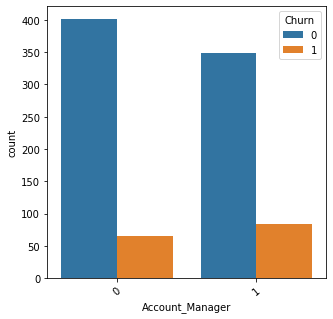

In [24]:
# plotting the counplot w.r.t. the target variable
fig, axs = plt.subplots(figsize = (5,5))
sns.countplot(x = "Account_Manager", 
              hue = "Churn", 
              data = customers_data, 
              order = customers_data['Account_Manager'].value_counts().index
             )
xticks(rotation = 40)
plt.show()

In [25]:
def view_cat(df,col,hue):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(customers_data))), (p.get_x()+0.05, p.get_height()+20))  
    
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp


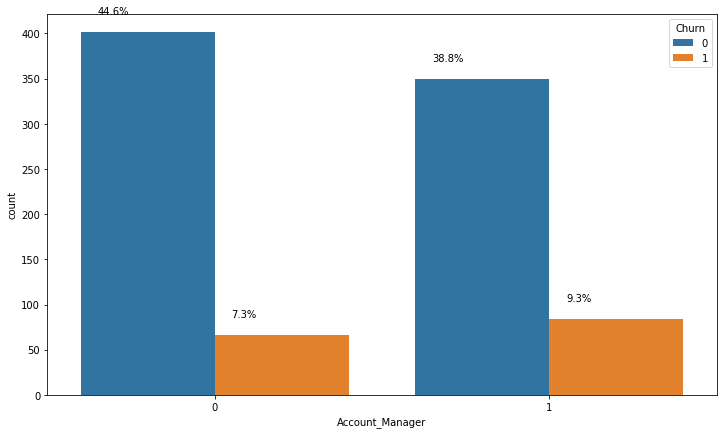

In [26]:
view_cat(customers_data,'Account_Manager','Churn')

**Observations**
- people with account manager stands a 19% chance of churning. 
- people without account manager stands a 14% chance of churning. 
- Hence people with account manager churn the most


**Does age affect churn?**


In [27]:
def view_con(df,col,hue):

    sns.set(style="darkgrid")
    
    fig, ax=plt.subplots(nrows =2,ncols=3,figsize=(20,8))
    ax[0][0].set_title("churn = 1")    
    ax[0][1].set_title("churn = 1")
    ax[0][2].set_title("churn = 1")
    sns.distplot(df[df[hue]==1][col],ax=ax[0][0])
    sns.violinplot(data =df[df[hue]==1], x=col,ax=ax[0][1], inner="quartile")
    sns.boxplot(data =df[df[hue]==1], x=col,ax=ax[0][2],orient='v')
    
    ax[1][0].set_title("churn = 0")        
    ax[1][1].set_title("churn = 0")
    ax[1][2].set_title("churn = 0")

    sns.distplot(df[df[hue]==0][col],ax=ax[1][0])
    sns.violinplot(data =df[df[hue]==0], x=col,ax=ax[1][1], inner="quartile")
    sns.boxplot(data =df[df[hue]==0], x=col,ax=ax[1][2],orient='v')
    

In [28]:
def view_con1(df,col,hue):

    sns.set(style="darkgrid")
    
    fig, axs = plt.subplots(2,2,figsize = (20,6.5))
    axs[0][0].set_title("churn = 1")    
    axs[0][1].set_title("churn = 1")
    axs[1][0].set_title("churn = 0")        
    axs[1][1].set_title("churn = 0")
    sns.boxplot(df[df['Churn']==1][col], ax = axs[0][0])
    df[df['Churn']==1][col].plot.hist(bins=20, ax = axs[0][1])
    sns.boxplot(df[customers_data['Churn']==0][col], ax = axs[1][0])
    df[df['Churn']==0][col].plot.hist(bins=20, ax = axs[1][1])
    plt.show()
   

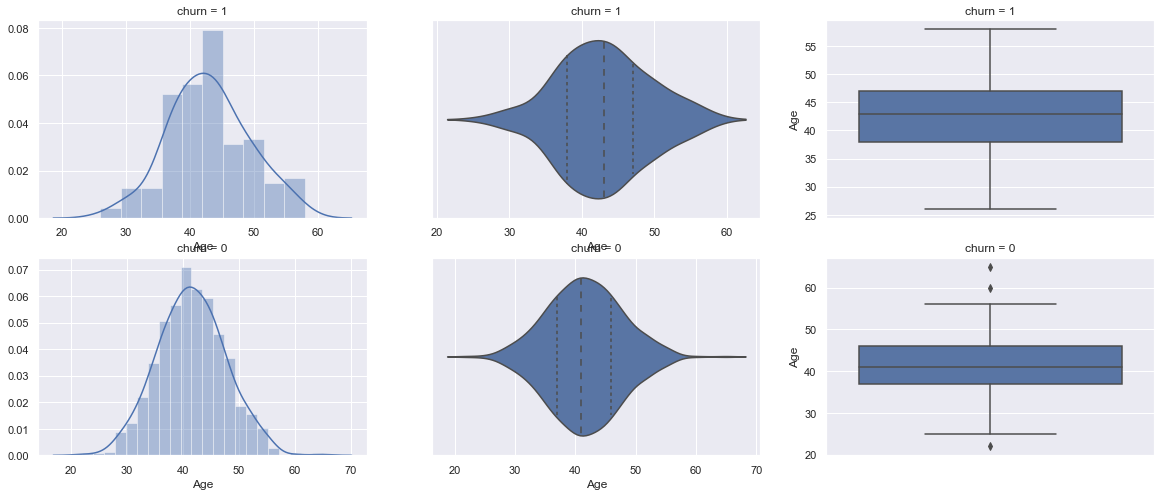

In [29]:
view_con(customers_data,'Age','Churn')

In [30]:
customers_data[customers_data['Churn']==0]['Age'].describe()

count    750.000000
mean      41.581333
std        6.071507
min       22.000000
25%       37.000000
50%       41.000000
75%       46.000000
max       65.000000
Name: Age, dtype: float64

In [31]:
customers_data[customers_data['Churn']==1]['Age'].describe()

count    150.000000
mean      42.993333
std        6.289969
min       26.000000
25%       38.000000
50%       43.000000
75%       47.000000
max       58.000000
Name: Age, dtype: float64

**Observations**
- The mean age of people that churn is a bit higher than the mean of those that did not churn. 
- The min, 25%, 50% and 75% percentile and max of those that churn is more than those that did not churn. 
- From the observations, older individuals has more tendency of churning.


- 4. Which features strongly affects churn?


**Does year affect churn?**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


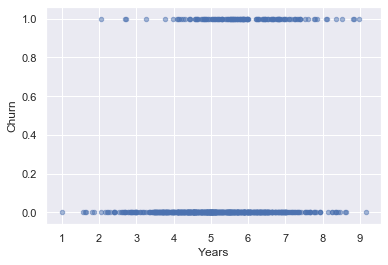

In [32]:
customers_data.plot.scatter(x="Years", y="Churn", alpha=0.5)
plt.show()

In [33]:
#for people with number of sites less than 4
customers_data[customers_data["Years"]<4]['Churn'].value_counts()

0    128
1      6
Name: Churn, dtype: int64

In [34]:
#for people with years greater than4 and less than 8
customers_data[(customers_data["Years"]>4)&(customers_data["Years"]<8)]['Churn'].value_counts()


0    609
1    137
Name: Churn, dtype: int64

In [35]:
#for people with years greater than 8
customers_data[customers_data["Years"]>8]['Churn'].value_counts()

0    11
1     7
Name: Churn, dtype: int64

In [36]:
 def scatter_churn(df,x,y):
    color=['c','r']
    for n in range(len(df)):
        plt.scatter(x=df[x][n], 
                     y=df[y][n],
                     color=color[customers_data["Churn"][n]],
                     alpha=0.2)
    plt.xlabel(df[x].name) # Set text for the x axis
    plt.ylabel(df[y].name)
    plt.show()

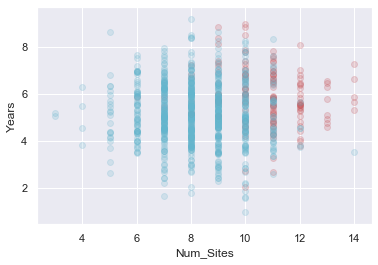

In [37]:
scatter_churn(customers_data,"Num_Sites","Years")     

**Observations** 
- Poeple that has lesser year do not usually churn while those that has more year usually churn. 
- Only 6 people churn out of 134 people with less than 4 years.
- Only 11 person did not churn out 18 people with greater than 8 year. 

**Does Total_Purchase affect churn?**

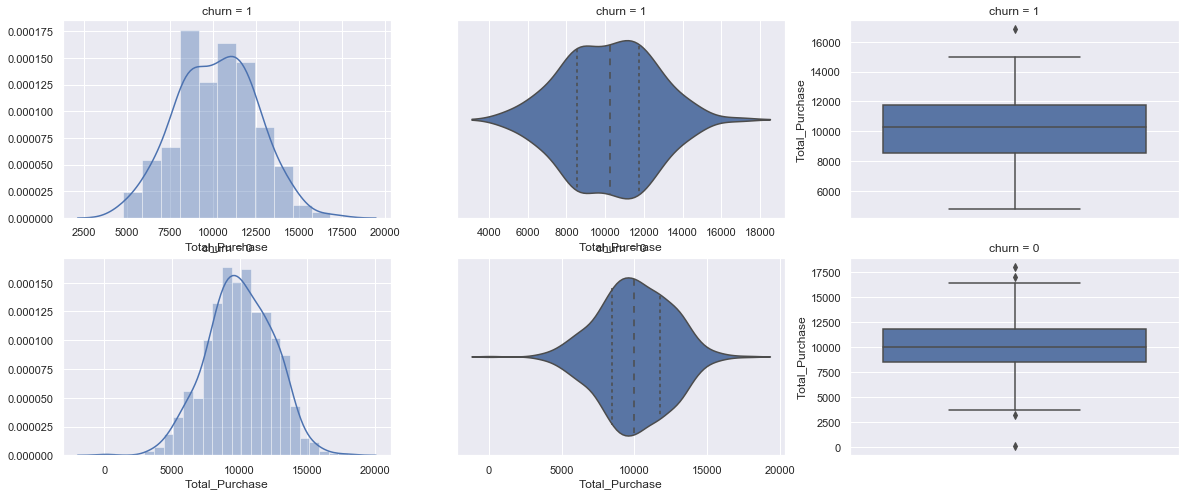

In [38]:
view_con(customers_data,'Total_Purchase','Churn')

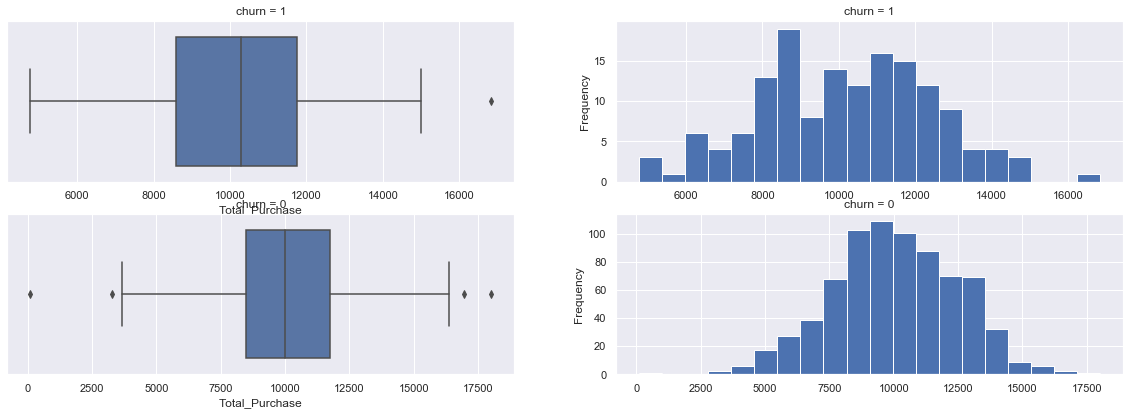

In [39]:
view_con1(customers_data,'Total_Purchase','Churn')

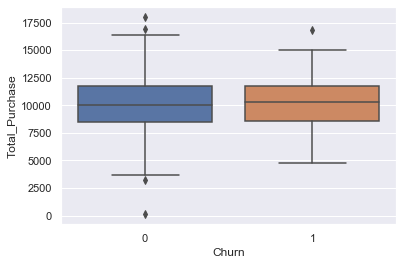

In [40]:
# plotting boxplot w.r.t. the target variable
sns.boxplot(y = 'Total_Purchase', x = 'Churn', data = customers_data)
plt.show()

In [41]:
customers_data[customers_data['Churn']==1]['Total_Purchase'].describe()

count      150.000000
mean     10192.179933
std       2283.594792
min       4771.650000
25%       8572.682500
50%      10273.760000
75%      11754.017500
max      16838.940000
Name: Total_Purchase, dtype: float64

In [42]:
customers_data[customers_data['Churn']==0]['Total_Purchase'].describe()

count      750.000000
mean     10036.952853
std       2433.519860
min        100.000000
25%       8477.082500
50%       9999.705000
75%      11762.277500
max      18026.010000
Name: Total_Purchase, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


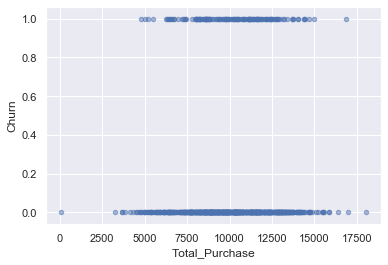

In [43]:
customers_data.plot.scatter(x="Total_Purchase", y="Churn", alpha=0.5)
plt.show()

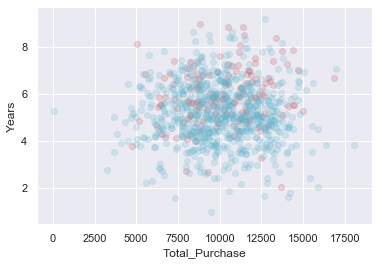

In [44]:
scatter_churn(customers_data,"Total_Purchase","Years")     

**Observations**
- The mean Total_Purchase for people that churn is a bit higher than the mean Total_Purchase for those that did not churn. 
- people that spent less than 4700 do not churn.

**Does Onboard_date affect churn?**


In [45]:
customers_data['Onboard_date'].value_counts()

2014-01-01    103
2006-01-01    102
2007-01-01     90
2010-01-01     84
2009-01-01     84
2013-01-01     80
2008-01-01     76
2015-01-01     75
2011-01-01     72
2012-01-01     67
2016-01-01     67
Name: Onboard_date, dtype: int64

In [46]:
Onboard=churn_ratio('Onboard_date')
Onboard

,uniq_count_Onboard_date,num_of_Churn,churn_ratio
2008-01-01,76,17,22.37
2011-01-01,72,15,20.83
2010-01-01,84,16,19.05
2007-01-01,90,17,18.89
2015-01-01,75,14,18.67
2006-01-01,102,19,18.63
2016-01-01,67,11,16.42
2012-01-01,67,11,16.42
2013-01-01,80,10,12.50
2009-01-01,84,9,10.71


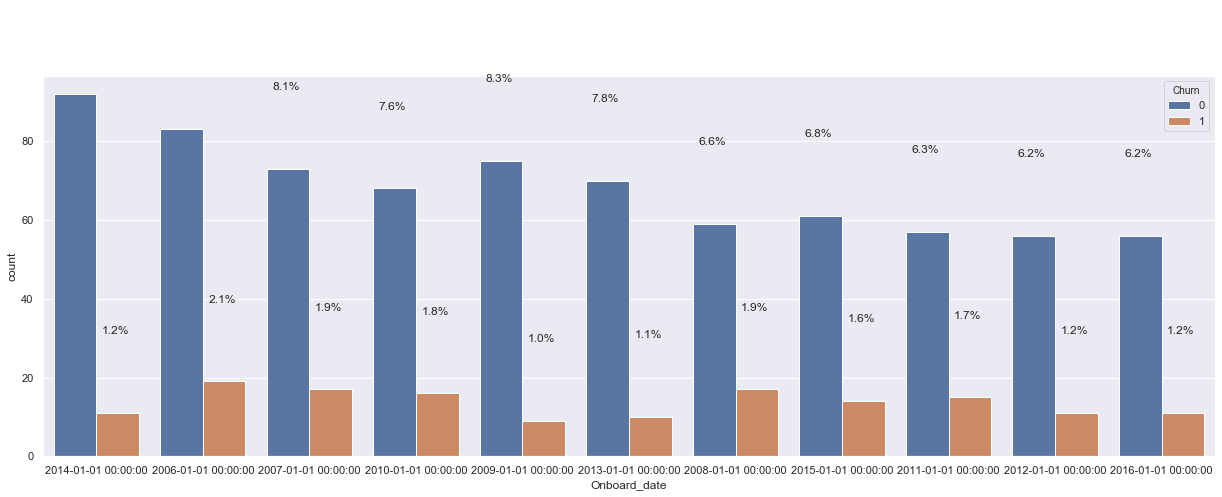

In [47]:
view_cat(customers_data,'Onboard_date','Churn')

In [48]:
Onboard=Onboard.sort_index()

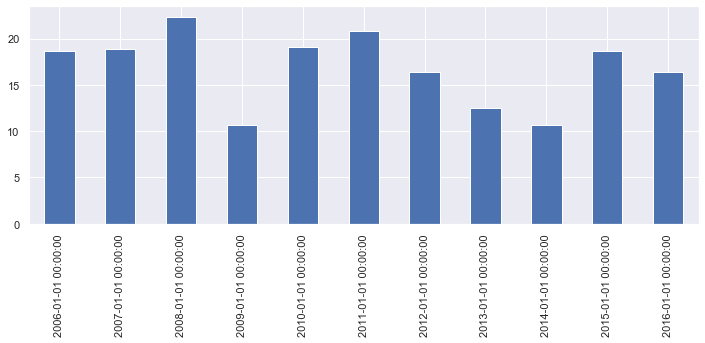

In [49]:
Onboard['churn_ratio'].plot.bar(figsize=(12, 4))

**Observations**
- The churn rate for people onboard in 2008 is the highest rate ever, that means a lot of customers was lost that year. 
- The churn rate was decreased gradually from 2011 to 2014 and it inccreased drastically in 2015.
- The highest churn rate yearly decrease percentage was in 2009.

**Which features strongly affects churn?**

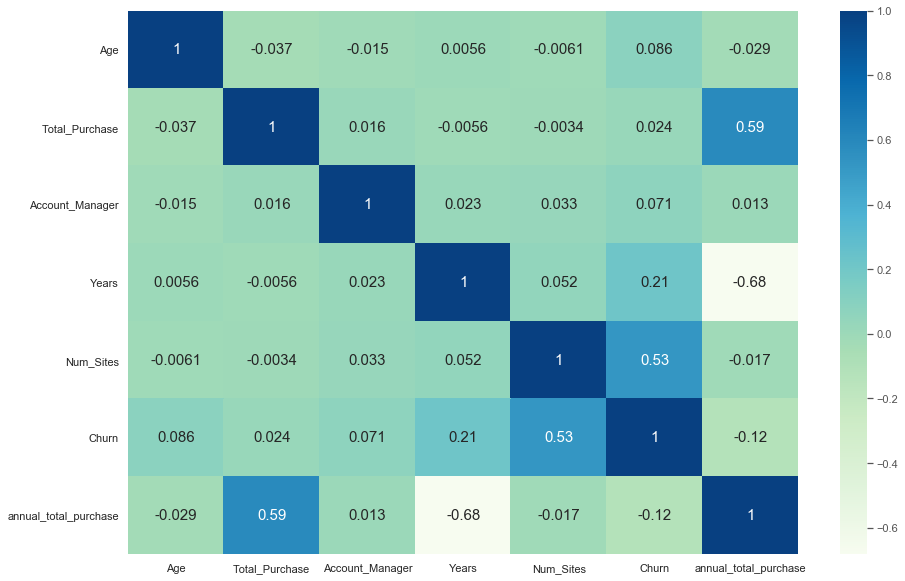

In [50]:
# make a correlation plot (heatmap)
corr_mx = customers_data.corr()
f, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':15}, cmap='GnBu')

**Observation**

- There is a high positive correlation between number of sites  and churn (with rscore of 0.53). 
- The new feature, annual_total_purchase has a very weak negative correlation with  churn, therefore, its not a useful feature.
- Another useful feature is year.
- Num_Sites strongly affects churn.
- years also has a strong positive correlation with churn

**can we use a new feature, annual total purchase to predict churn?**


From the heatmap the new feature, annual total purchase is not good feature for predicting churn.

**Can we predict car churn based on the available features ?**

Yes we can predict churn with:
- 1.Num_Sites
- 2.Years	 
- 3.Age
- 4.Account_Manager	
- 5.Total_Purchase
